In [1]:
#data explorer
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
'''
u = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22%20AND%20YEAR%3A{}&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"
#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22ANDYEAR%3A[1988]&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=10&offset=0&format=json&download=false&filename=data_file"
#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"
summary_by_year = pd.DataFrame()
yr_list = [1990,1991,1992]
url_dic = {}
res = []
res_dict = {}

# List of the states
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

test_list = ["Alabama","Alaska","Arizona"]

year_list = []
for i in range(25):
    year_list.append(1987 + i)
    
# Loop to add each state's data to dictionary 
for state in state_list:
    url_state = url.format(state)
    summary_by_year.update({state: requests.get(url_state).json()})

for state in test_list:
    url_state = u.format(state)
    xc = requests.get(url_state).json()
    
for state in test_list:
    url_state = u.format(state)
#xc['data']
#xv = pd.DataFrame(xc['data'])
#xv
#summary_by_year['Alabama']['data'][0]
#pprint(summary_by_year['Alabama']['data'][0]['data'])

tick_c = 0
for state in test_list:
    for yr in year_list:
        url_state = u.format(state,yr)
        tdf = requests.get(url_state)
        res.append(tdf)
        res_dict.update({tick_c:tdf.json()})
        tick_c += 1
        #summary_by_year[yr] = pd.DataFrame(tdf['data'])
        #url_dic.update({F"{state},{yr}":url_state})
'''

'\nu = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22%20AND%20YEAR%3A{}&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"\n#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22ANDYEAR%3A[1988]&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=10&offset=0&format=json&download=false&filename=data_file"\n#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22&fields=STNAME%2CYEAR%2CLNAUTO%2CLNCON%2CLNCONOTH%2CLNCRCD%2CLNRE&sort_by=YEAR&sort_order=DESC&limit=100&offset=0&format=json&download=false&filename=data_file"\nsummary_by_year = pd.DataFrame()\nyr_list = [1990,1991,1992]\nurl_dic = {}\nres = []\nres_dict = {}\n\n# List of the states\nstate_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",\n  "Connect

In [3]:
debt_data = "../raw-data/fdicdata.csv"
debt = pd.read_csv(debt_data)

In [4]:
debt = debt.fillna(0)
debt.groupby('Year').sum()

,Unnamed: 0,Auto Loans,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due
Year,,,,,,,
1987,24,0.0,347986020,245471027,102514993,598699606,40563426
1988,23,0.0,374548881,257762209,116786672,673296777,41180485
1989,22,0.0,397857791,266883392,130974399,759284022,48058033
1990,21,0.0,399324743,266413460,132911283,825891247,58032820
1991,20,0.0,388996614,250462590,138534024,847976872,52539038
1992,19,0.0,383083172,247248620,135834552,864346330,43288016
1993,18,0.0,417290491,263489524,153800967,917591402,35896675
1994,17,0.0,484162516,296457862,187704654,990449769,34451707
1995,16,0.0,532640233,314878416,217761817,1072504445,41434525


In [5]:
debt['Other Loans'] = debt['Other Loans'] + debt['Auto Loans']
debt['Total Loans'] = debt['Total Loans'] + debt['Real Estate']
debt_clean = debt.drop(columns = ['Unnamed: 0','Auto Loans', 'State'])
debt_clean = debt_clean.sort_values('Year', ascending=True).reset_index().drop(columns = 'index')
debt_clean.to_csv('../raw-data/debt_clean.csv')

In [6]:
debt_clean

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due,Year
0,946685626,245471027.0,102514993,598699606,40563426,1987
1,1047845658,257762209.0,116786672,673296777,41180485,1988
2,1157141813,266883392.0,130974399,759284022,48058033,1989
3,1225215990,266413460.0,132911283,825891247,58032820,1990
4,1236973486,250462590.0,138534024,847976872,52539038,1991
5,1247429502,247248620.0,135834552,864346330,43288016,1992
6,1334881893,263489524.0,153800967,917591402,35896675,1993
7,1474612285,296457862.0,187704654,990449769,34451707,1994
8,1605144678,314878416.0,217761817,1072504445,41434525,1995
9,1690880054,325319914.0,234598883,1130961257,47557076,1996


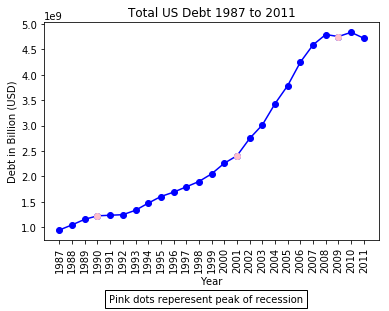

In [7]:
yr_tick = debt_clean['Year']
caption_rec = 'Pink dots reperesent peak of recession'
debt_clean.groupby('Year').sum().reset_index()
plt.plot(debt_clean['Year'], debt_clean['Total Loans'],
        color='blue', marker='o', linestyle='solid')
plt.plot(debt_clean['Year'][3], debt_clean['Total Loans'][3], color='pink', marker='o')
plt.plot(debt_clean['Year'][14], debt_clean['Total Loans'][14], color='pink', marker='o')
plt.plot(debt_clean['Year'][22], debt_clean['Total Loans'][22], color='pink', marker='o')
plt.xticks(ticks = yr_tick, rotation='vertical')
#plt.yscale('log')
plt.title('Total US Debt 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Debt in Billion (USD)')
plt.figtext(0.5, -0.09, caption_rec, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../clean_graphs/tot_debt.png')
plt.show()

In [8]:
# Creates dataframes based around each recession period
first_rec = debt_clean[(debt_clean['Year'] == 1987) | (debt_clean['Year'] == 1988) | (debt_clean['Year'] == 1989) | (debt_clean['Year'] == 1990) | 
          (debt_clean['Year'] == 1991) | (debt_clean['Year'] == 1992) | (debt_clean['Year'] == 1993)]
second_rec = debt_clean[(debt_clean['Year'] == 1998) | (debt_clean['Year'] == 1999) | (debt_clean['Year'] == 2000) | (debt_clean['Year'] == 2001) |
          (debt_clean['Year'] == 2002) | (debt_clean['Year'] == 2003) | (debt_clean['Year'] == 2004)]
third_rec = debt_clean[(debt_clean['Year'] == 2005) | (debt_clean['Year'] == 2006) | (debt_clean['Year'] == 2007) | (debt_clean['Year'] == 2008) | 
          (debt_clean['Year'] == 2009) | (debt_clean['Year'] == 2010) | (debt_clean['Year'] == 2011)]

# Sums the data for each recession dataframe 
first_rec = first_rec.groupby('Year').sum().reset_index()
second_rec = second_rec.groupby('Year').sum().reset_index()
third_rec = third_rec.groupby('Year').sum().reset_index()

# Caption to denote what year means when plotting each recession
caption_text = '3 Years before and after peak recession year included'

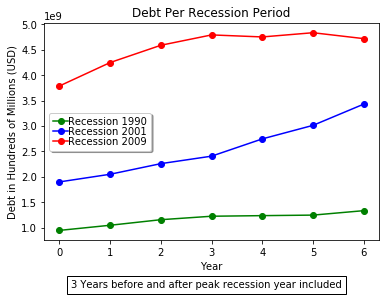

In [9]:
# Plots the total amount of loan debt for each respective recession period 
plt.plot(first_rec['Total Loans'],
        color='green', marker='o', linestyle='solid')
plt.plot(second_rec['Total Loans'],
        color='blue', marker='o', linestyle='solid')
plt.plot(third_rec['Total Loans'],
        color='red', marker='o', linestyle='solid')
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('Debt Per Recession Period')
plt.xlabel('Year')
plt.ylabel('Debt in Hundreds of Millions (USD)')
plt.figtext(0.5, -0.04, caption_text, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../graphs/debt_per_rec.png')
plt.show()

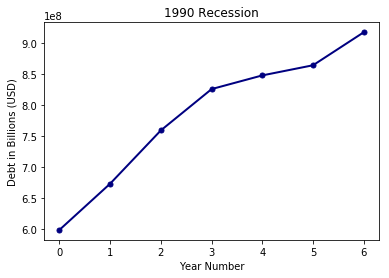

In [10]:
real_estate_only = ['Year', 'Total Loans' ,'Other Loans', 'Credit Cards',  'Total Past Due']
first_rec_line_real = first_rec.drop(columns = real_estate_only)
ax = first_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
ax.set_xlabel("Year Number")
ax.set_ylabel("Debt in Billions (USD)")
ax.get_legend().remove()
plt.savefig('../graphs/real_estate_1990.png')

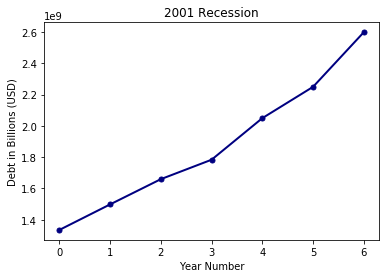

In [11]:
second_rec_line_real = second_rec.drop(columns = real_estate_only)
ax2 = second_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2001 Recession')
ax2.set_xlabel("Year Number")
ax2.set_ylabel("Debt in Billions (USD)")
ax2.get_legend().remove()
plt.savefig('../graphs/real_estate_2001.png')

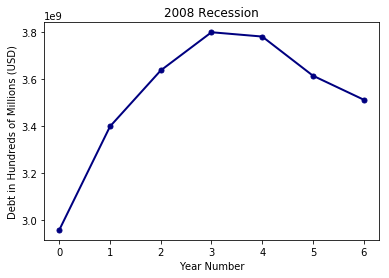

In [12]:
third_rec_line_real = third_rec.drop(columns = real_estate_only)
ax3 = third_rec_line_real.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2008 Recession')
ax3.set_xlabel("Year Number")
ax3.set_ylabel("Debt in Hundreds of Millions (USD)")
ax3.get_legend().remove()
plt.savefig('../graphs/real_estate_2011.png')
#debt_clean_first_rec_tot.plot(x='Year', y='Total Loans', kind = 'line')
#debt_clean_second_rec_tot.plot(x='Year', y='Total Loans')
#debt_clean_third_rec_tot.plot(x='Year', y='Total Loans')

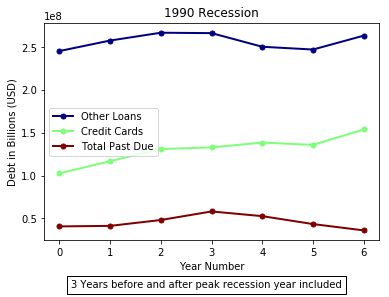

In [13]:
all_but_real_estate = ['Year', 'Total Loans', 'Real Estate']
first_rec_line_else = first_rec.drop(columns = all_but_real_estate)
bx = first_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
bx.set_xlabel("Year Number")
bx.set_ylabel("Debt in Billions (USD)")
bx.legend(loc="best")
plt.figtext(0.5, -0.04, caption_text, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../graphs/rec_debt_1990.png')

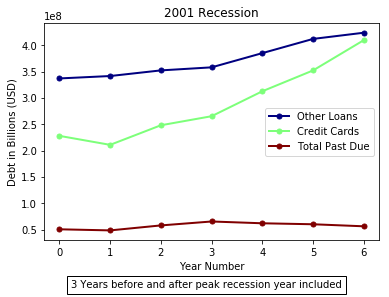

In [14]:
second_rec_line_else = second_rec.drop(columns = all_but_real_estate)
bx2 = second_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2001 Recession')
bx2.set_xlabel("Year Number")
bx2.set_ylabel("Debt in Billions (USD)")
bx2.legend(loc="best")
plt.figtext(0.5, -0.04, caption_text, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../graphs/rec_debt_2000.png')

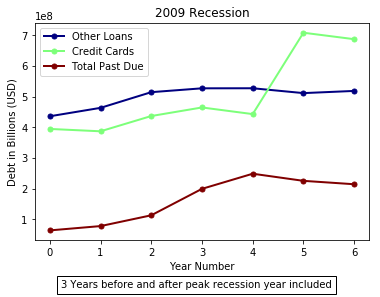

In [15]:
third_rec_line_else = third_rec.drop(columns = all_but_real_estate)
bx3 = third_rec_line_else.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2009 Recession')
bx3.set_xlabel("Year Number")
bx3.set_ylabel("Debt in Billions (USD)")
bx3.legend(loc="best")
plt.figtext(0.5, -0.04, caption_text, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../graphs/rec_debt_2011.png')

In [16]:
first_rec_one = first_rec[first_rec['Year'] < 1990]
first_rec_peak = first_rec[first_rec['Year'] == 1990]
first_rec_two = first_rec[first_rec['Year'] > 1990]

caption_rec_per = 'Green bar indicates peak of recession'

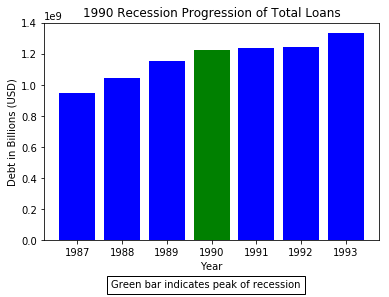

In [17]:
#plt.bar(first_rec['Year'],first_rec['Total Loans'], tick_label = first_rec['Year'], color = 'green')
plt.bar(first_rec_one['Year'],first_rec_one['Total Loans'], color = 'blue')
plt.bar(first_rec_peak['Year'],first_rec_peak['Total Loans'], color = 'green')
plt.bar(first_rec_two['Year'],first_rec_two['Total Loans'], color = 'blue')
plt.title('1990 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Billions (USD)")
plt.figtext(0.5, -0.04, caption_rec_per, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../clean_graphs/rec_debt_bar_1990.png')
plt.show()

In [18]:
second_rec_one = second_rec[second_rec['Year'] < 2001]
second_rec_peak = second_rec[second_rec['Year'] == 2001]
second_rec_two = second_rec[second_rec['Year'] > 2001]

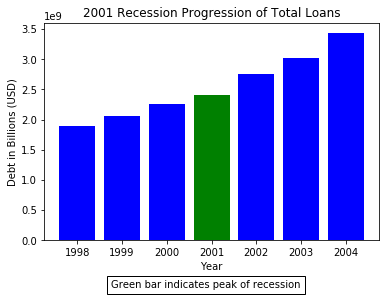

In [19]:
plt.bar(second_rec_one['Year'],second_rec_one['Total Loans'], color = 'blue')
plt.bar(second_rec_peak['Year'],second_rec_peak['Total Loans'], color = 'green')
plt.bar(second_rec_two['Year'],second_rec_two['Total Loans'], color = 'blue')
plt.title('2001 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Billions (USD)")
plt.figtext(0.5, -0.04, caption_rec_per, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../clean_graphs/rec_debt_bar_2001.png')
plt.show()

In [20]:
third_rec_one = third_rec[third_rec['Year'] < 2008]
third_rec_peak = third_rec[third_rec['Year'] == 2008]
third_rec_two = third_rec[third_rec['Year'] > 2008]

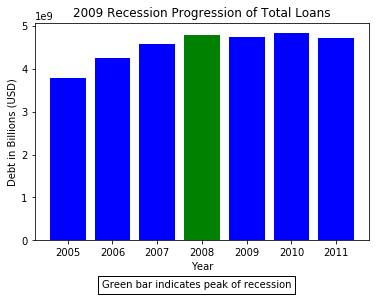

In [21]:
plt.bar(third_rec['Year'],third_rec['Total Loans'], tick_label = third_rec['Year'], color = 'red')
plt.bar(third_rec_one['Year'],third_rec_one['Total Loans'], color = 'blue')
plt.bar(third_rec_peak['Year'],third_rec_peak['Total Loans'], color = 'green')
plt.bar(third_rec_two['Year'],third_rec_two['Total Loans'], color = 'blue')
plt.title('2009 Recession Progression of Total Loans')
plt.xlabel('Year')
plt.ylabel("Debt in Billions (USD)")
plt.figtext(0.5, -0.04, caption_rec_per, wrap=True, horizontalalignment='center', fontsize=10,
           bbox=dict(facecolor='none', edgecolor='black'))
plt.savefig('../clean_graphs/rec_debt_bar_2011.png')
plt.show()

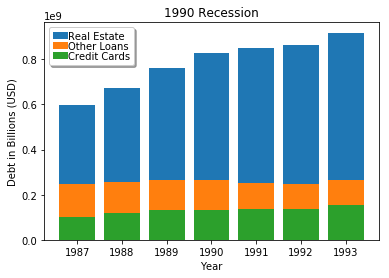

In [22]:
plt.bar(first_rec['Year'],first_rec['Real Estate'])
plt.bar(first_rec['Year'],first_rec['Other Loans'])
plt.bar(first_rec['Year'],first_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('1990 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Billions (USD)')
plt.savefig('../clean_graphs/stacked_debt_bar_1990.png')
plt.show()

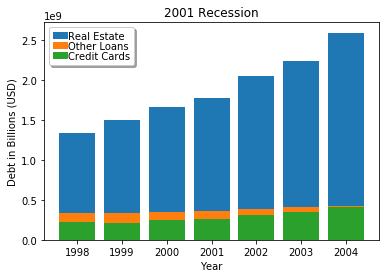

In [23]:
plt.bar(second_rec['Year'],second_rec['Real Estate'])
plt.bar(second_rec['Year'],second_rec['Other Loans'])
plt.bar(second_rec['Year'],second_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2001 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Billions (USD)')
plt.savefig('../clean_graphs/stacked_debt_bar_2001.png')
plt.show()

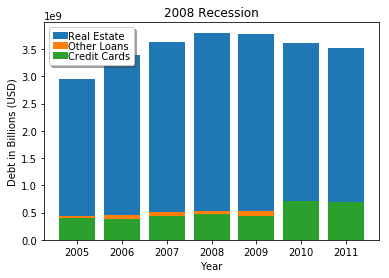

In [24]:
plt.bar(third_rec['Year'],third_rec['Real Estate'])
plt.bar(third_rec['Year'],third_rec['Other Loans'])
plt.bar(third_rec['Year'],third_rec['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2008 Recession')
plt.xlabel('Year')
plt.ylabel('Debt in Billions (USD)')
plt.savefig('../clean_graphs/stacked_debt_bar_2008.png')
plt.show()

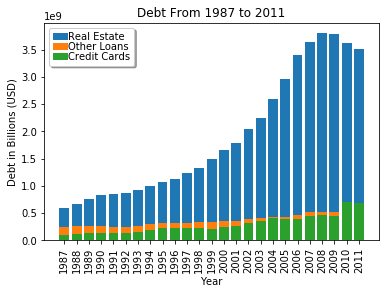

In [25]:
plt.bar(debt_clean['Year'],debt_clean['Real Estate'])
plt.bar(debt_clean['Year'],debt_clean['Other Loans'])
plt.bar(debt_clean['Year'],debt_clean['Credit Cards'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best',
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(ticks = yr_tick, rotation='vertical')
plt.title('Debt From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Debt in Billions (USD)')
plt.savefig('../clean_graphs/stacked_debt_bar.png')
plt.show()

In [26]:
'''
debt_clean_all_years_test = debt_clean_all_years
per = debt_clean_all_years['Total Loans']
pers = []
for i in range(1,len(per)):
    delta = ((per[i]/per[i-1]) -1) * 100
    pers.append(delta)
'''

"\ndebt_clean_all_years_test = debt_clean_all_years\nper = debt_clean_all_years['Total Loans']\npers = []\nfor i in range(1,len(per)):\n    delta = ((per[i]/per[i-1]) -1) * 100\n    pers.append(delta)\n"

In [27]:
#debt_clean = debt_clean.drop(columns = ['State'])
#debt_clean = debt_clean.sort_values('Year')
debt_clean

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due,Year
0,946685626,245471027.0,102514993,598699606,40563426,1987
1,1047845658,257762209.0,116786672,673296777,41180485,1988
2,1157141813,266883392.0,130974399,759284022,48058033,1989
3,1225215990,266413460.0,132911283,825891247,58032820,1990
4,1236973486,250462590.0,138534024,847976872,52539038,1991
5,1247429502,247248620.0,135834552,864346330,43288016,1992
6,1334881893,263489524.0,153800967,917591402,35896675,1993
7,1474612285,296457862.0,187704654,990449769,34451707,1994
8,1605144678,314878416.0,217761817,1072504445,41434525,1995
9,1690880054,325319914.0,234598883,1130961257,47557076,1996


In [28]:
store_col = list(debt_clean.keys())
store_col.pop(-1)
debt_clean['Year']
store_col

['Total Loans', 'Other Loans', 'Credit Cards', 'Real Estate', 'Total Past Due']

In [29]:
#print(store_col)
a_df = pd.DataFrame()
year_order = []
for head in store_col:
    if head == 'Year':
        a_df[head] = debt_clean[head]
    else:
        percentage = debt_clean[head]
        percs = []
        for i in range(1,len(percentage)):
            delta = 0
            delta = ((percentage[i] - percentage[i-1])/percentage[i - 1]) * 100
            percs.append(delta)
        a_df[head] = percs
        a_df['Year'] = debt_clean['Year'] + 1
a_df

#pd.concat([pd.DataFrame[j], columns = [head] for j in range(len(store))], ignore_index=True)

#pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

,Total Loans,Year,Other Loans,Credit Cards,Real Estate,Total Past Due
0,10.685705,1988,5.007182,13.921553,12.459866,1.521220
1,10.430559,1989,3.538604,12.148413,12.771076,16.700988
2,5.882959,1990,-0.176081,1.478826,8.772373,20.755712
3,0.959626,1991,-5.987261,4.230447,2.674157,-9.466681
4,0.845290,1992,-1.283214,-1.948599,1.930413,-17.607901
5,7.010608,1993,6.568653,13.226690,6.160155,-17.074797
6,10.467622,1994,12.512201,22.043871,7.940175,-4.025353
7,8.851981,1995,6.213549,16.013009,8.284587,20.268424
8,5.341287,1996,3.316041,7.731872,5.450496,14.776448
9,6.168611,1997,-0.154060,-0.326874,9.334701,2.201279


In [30]:
# Calculates the percent increase
def percentage_delta(header):
    empty_df = pd.DataFrame()
    percen = []
    for head in store_col:
        percentages = debt_clean[head]
        percen = []
        for i in range(1,len(percentages)):
            delta = 0
            delta = ((percentages[i]/percentages[i-1])/percentages[i-1]) * 100
            percen.append(delta)
        empty_df[head] = percen
    empty_df['Year'] = debt_clean['Year'] + 1
    
    return empty_df

In [31]:
percentage_delta_df = a_df
percentage_delta_df.to_csv('../raw-data/debt_percenta_delta.csv')
percentage_delta_df.sort_values('Year')
per_yrs = percentage_delta_df['Year']
percentage_delta_df

,Total Loans,Year,Other Loans,Credit Cards,Real Estate,Total Past Due
0,10.685705,1988,5.007182,13.921553,12.459866,1.521220
1,10.430559,1989,3.538604,12.148413,12.771076,16.700988
2,5.882959,1990,-0.176081,1.478826,8.772373,20.755712
3,0.959626,1991,-5.987261,4.230447,2.674157,-9.466681
4,0.845290,1992,-1.283214,-1.948599,1.930413,-17.607901
5,7.010608,1993,6.568653,13.226690,6.160155,-17.074797
6,10.467622,1994,12.512201,22.043871,7.940175,-4.025353
7,8.851981,1995,6.213549,16.013009,8.284587,20.268424
8,5.341287,1996,3.316041,7.731872,5.450496,14.776448
9,6.168611,1997,-0.154060,-0.326874,9.334701,2.201279


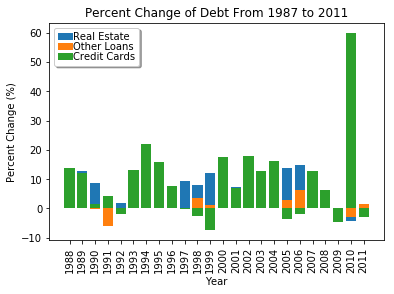

In [32]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Real Estate'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Other Loans'])
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Credit Cards'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xticks(ticks = per_yrs, rotation='vertical')
plt.title('Percent Change of Debt From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../clean_graphs/stacked_per_debt_bar.png')
plt.show()

In [33]:
per_delta_rec_one = percentage_delta_df[percentage_delta_df['Year'] == 1990]
per_delta_rec_two = percentage_delta_df[percentage_delta_df['Year'] == 2001]
per_delta_rec_three = percentage_delta_df[percentage_delta_df['Year'] == 2008]

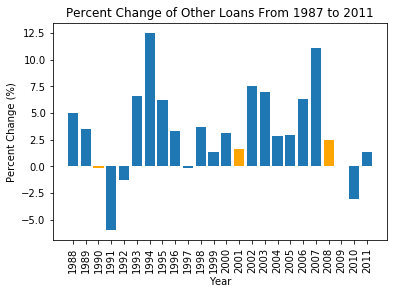

In [34]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Other Loans'])
plt.bar(per_delta_rec_one['Year'],per_delta_rec_one['Other Loans'], color = 'orange')
plt.bar(per_delta_rec_two['Year'],per_delta_rec_two['Other Loans'], color = 'orange')
plt.bar(per_delta_rec_three['Year'],per_delta_rec_three['Other Loans'], color = 'orange')
plt.xticks(ticks = per_yrs, rotation='vertical')
plt.title('Percent Change of Other Loans From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../clean_graphs/per_other_debt_bar.png')
plt.show()

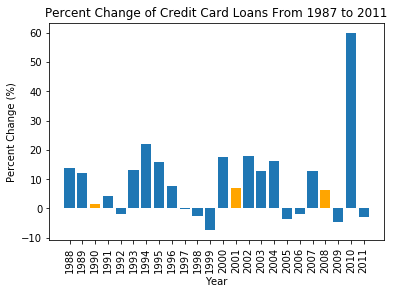

In [35]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Credit Cards'])
plt.bar(per_delta_rec_one['Year'],per_delta_rec_one['Credit Cards'], color = 'orange')
plt.bar(per_delta_rec_two['Year'],per_delta_rec_two['Credit Cards'], color = 'orange')
plt.bar(per_delta_rec_three['Year'],per_delta_rec_three['Credit Cards'], color = 'orange')
plt.xticks(ticks = per_yrs, rotation='vertical')
plt.title('Percent Change of Credit Card Loans From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../clean_graphs/per_cc_debt_bar.png')
plt.show()

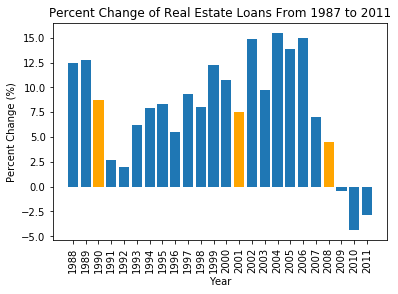

In [36]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Real Estate'])
plt.bar(per_delta_rec_one['Year'],per_delta_rec_one['Real Estate'], color = 'orange')
plt.bar(per_delta_rec_two['Year'],per_delta_rec_two['Real Estate'], color = 'orange')
plt.bar(per_delta_rec_three['Year'],per_delta_rec_three['Real Estate'], color = 'orange')
plt.xticks(ticks = per_yrs, rotation='vertical')
plt.title('Percent Change of Real Estate Loans From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../clean_graphs/per_realest_debt_bar.png')
plt.show()

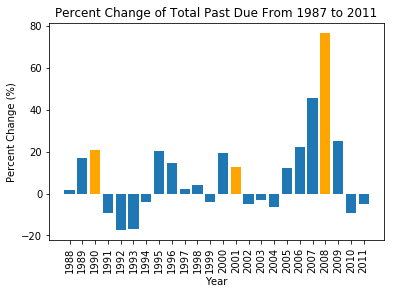

In [37]:
plt.bar(percentage_delta_df['Year'],percentage_delta_df['Total Past Due'])
plt.bar(per_delta_rec_one['Year'],per_delta_rec_one['Total Past Due'], color = 'orange')
plt.bar(per_delta_rec_two['Year'],per_delta_rec_two['Total Past Due'], color = 'orange')
plt.bar(per_delta_rec_three['Year'],per_delta_rec_three['Total Past Due'], color = 'orange')
#plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_third_rec_tot['Real Estate'])
plt.xticks(ticks = per_yrs, rotation='vertical')
plt.title('Percent Change of Total Past Due From 1987 to 2011')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../clean_graphs/stacked_per_past_due_bar.png')
plt.show()

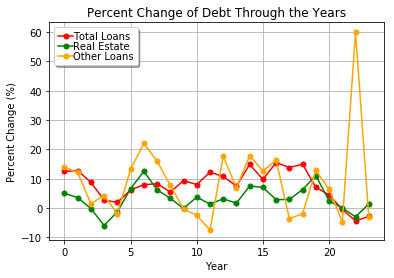

In [38]:
plt.plot(percentage_delta_df['Real Estate'], color='red', marker='o', markersize=5, linestyle='solid')
plt.plot(percentage_delta_df['Other Loans'], color='green', marker='o', markersize=5, linestyle='solid')
plt.plot(percentage_delta_df['Credit Cards'], color='orange', marker='o', markersize=5, linestyle='solid')
plt.legend(['Total Loans', 'Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.grid()
plt.title('Percent Change of Debt Through the Years')
plt.xlabel('Year')
plt.ylabel('Percent Change (%)')
plt.savefig('../graphs/per_debt_line.png')
plt.show()

In [39]:
first_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 1987) | (percentage_delta_df['Year'] == 1988) | 
                                               (percentage_delta_df['Year'] == 1989) | (percentage_delta_df['Year'] == 1990) | 
                                               (percentage_delta_df['Year'] == 1991) | (percentage_delta_df['Year'] == 1992) | 
                                               (percentage_delta_df['Year'] == 1993)]

second_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 1998) | (percentage_delta_df['Year'] == 1999) | 
                                     (percentage_delta_df['Year'] == 2000) | (percentage_delta_df['Year'] == 2001) | 
                                     (percentage_delta_df['Year'] == 2002) | (percentage_delta_df['Year'] == 2003) | 
                                     (percentage_delta_df['Year'] == 2004)]

third_rec_per = percentage_delta_df[(percentage_delta_df['Year'] == 2005) | (percentage_delta_df['Year'] == 2006) | 
                                               (percentage_delta_df['Year'] == 2007) | (percentage_delta_df['Year'] == 2008) | 
                                               (percentage_delta_df['Year'] == 2009) | (percentage_delta_df['Year'] == 2010) | 
                                               (percentage_delta_df['Year'] == 2011)]

In [40]:
col_names = list(percentage_delta_df.keys())
col_names.pop(1)

'Year'

In [41]:
def per_bar_plot_90(column_name):
    plt.bar(first_rec_per['Year'],first_rec_per[column_name])
    plt.title(f'1990 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}.png')
    plt.show()

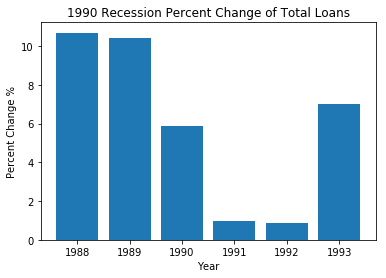

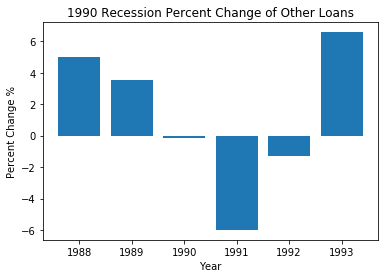

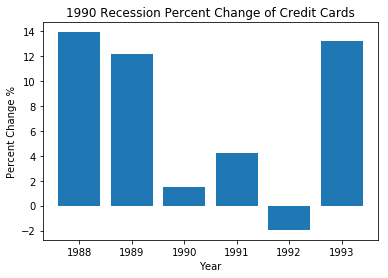

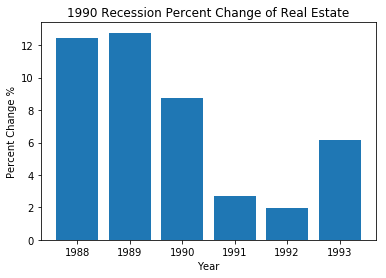

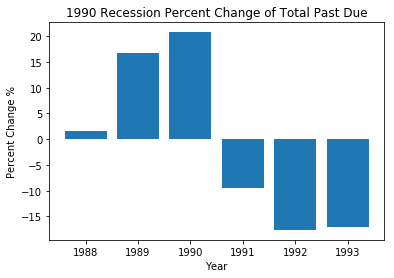

In [42]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_90(col_names[col])

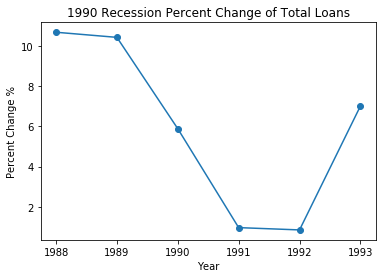

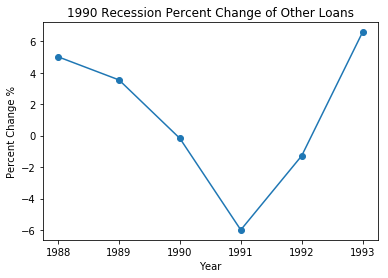

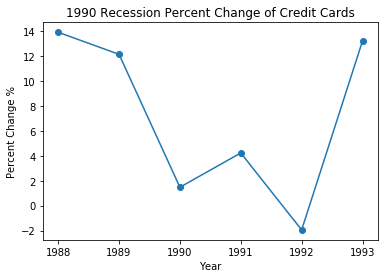

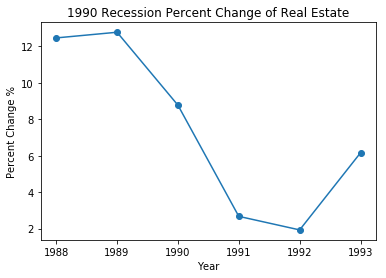

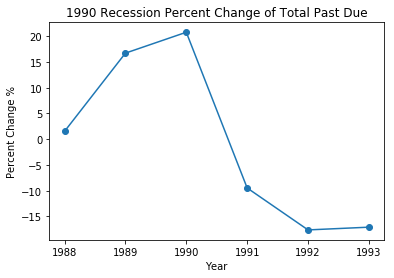

In [43]:
def per_line_plot_90(column_name):
    plt.plot(first_rec_per['Year'],first_rec_per[column_name], marker = 'o')
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'1990 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../clean_graphs/per_delta_line_{column_name}_90.png')
    plt.show()# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_line_plot_90(col_names[col])

In [44]:
def per_bar_plot_01(column_name):
    plt.bar(second_rec_per['Year'],second_rec_per[column_name])
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2001 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}_01.png')
    plt.show()

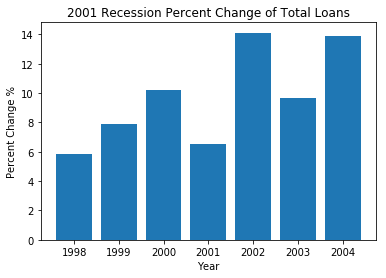

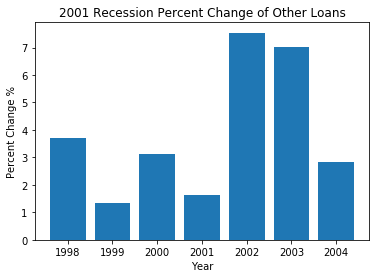

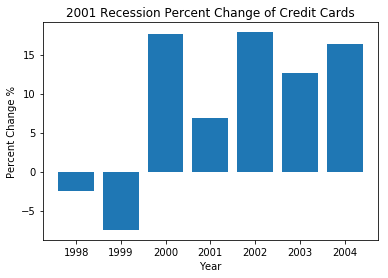

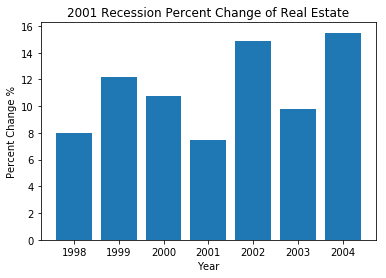

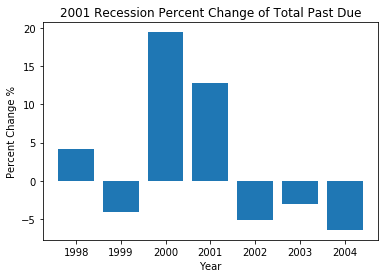

In [45]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_01(col_names[col])

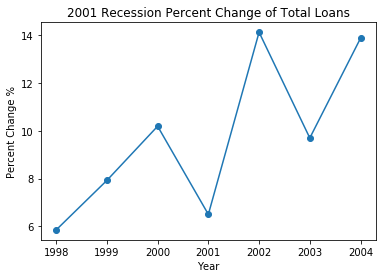

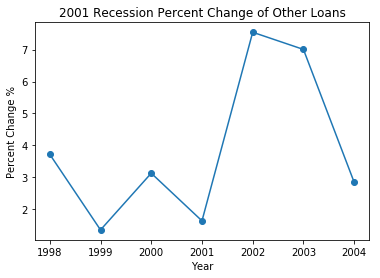

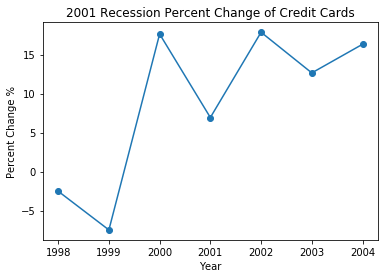

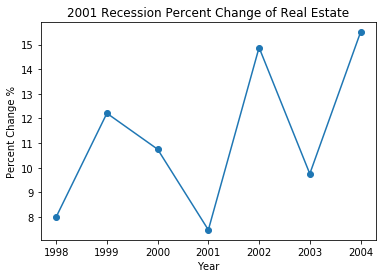

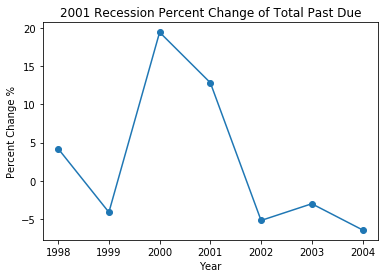

In [46]:
def per_line_plot_01(column_name):
    plt.plot(second_rec_per['Year'],second_rec_per[column_name], marker = 'o')
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2001 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../clean_graphs/per_delta_line_{column_name}_01.png')
    plt.show()# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_line_plot_01(col_names[col])

In [47]:
def per_bar_plot_08(column_name):
    plt.bar(third_rec_per['Year'],third_rec_per[column_name])
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2008 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../graphs/per_delta_bar_{column_name}_11.png')
    plt.show()

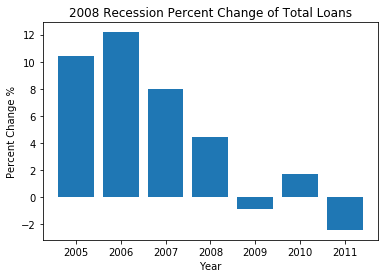

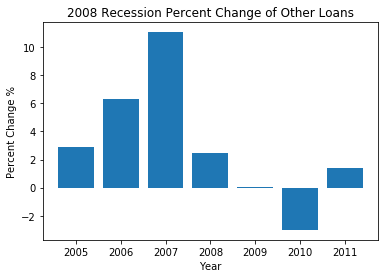

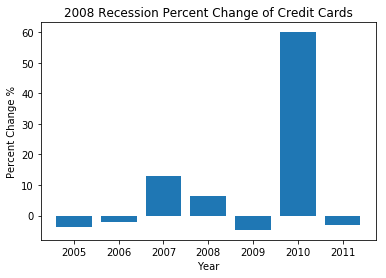

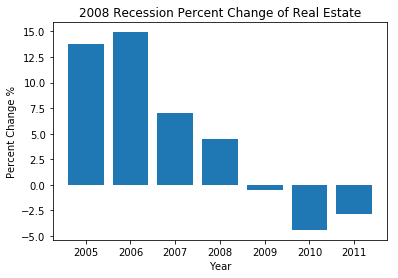

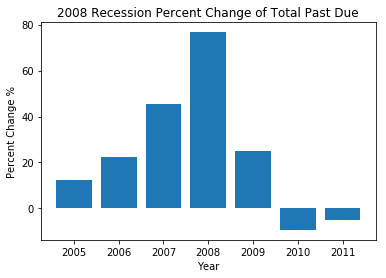

In [48]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_bar_plot_08(col_names[col])

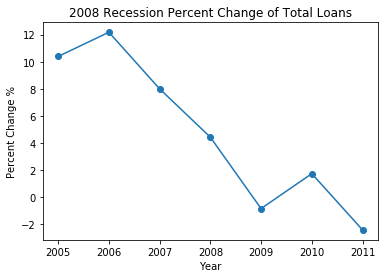

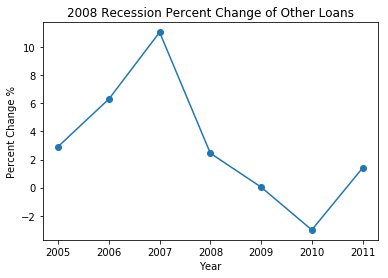

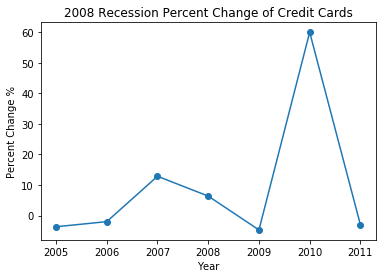

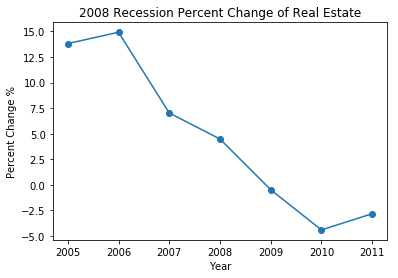

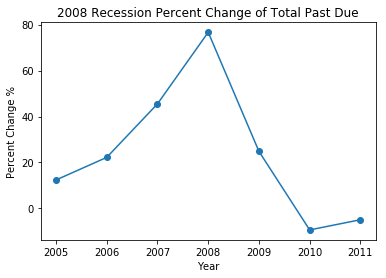

In [49]:
def per_line_plot_08(column_name):
    plt.plot(third_rec_per['Year'],third_rec_per[column_name], marker = 'o')
    #plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
    plt.title(f'2008 Recession Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change %')
    plt.savefig(f'../clean_graphs/per_delta_line_{column_name}_11.png')
    plt.show()
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_line_plot_08(col_names[col])

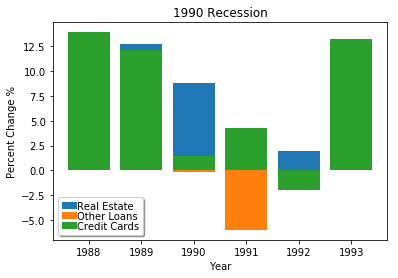

In [50]:
plt.bar(first_rec_per['Year'],first_rec_per['Real Estate'])
plt.bar(first_rec_per['Year'],first_rec_per['Other Loans'])
plt.bar(first_rec_per['Year'],first_rec_per['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('1990 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig('../clean_graphs/per_real_estate_bar_1990.png')
plt.show()

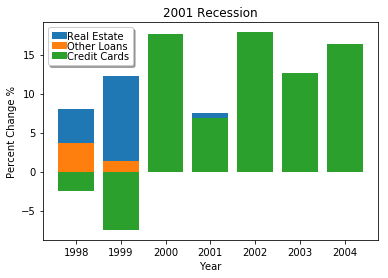

In [51]:
plt.bar(second_rec_per['Year'],second_rec_per['Real Estate'])
plt.bar(second_rec_per['Year'],second_rec_per['Other Loans'])
plt.bar(second_rec_per['Year'],second_rec_per['Credit Cards'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2001 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig(f'../clean_graphs/per_delta_bar_01.png')
plt.show()

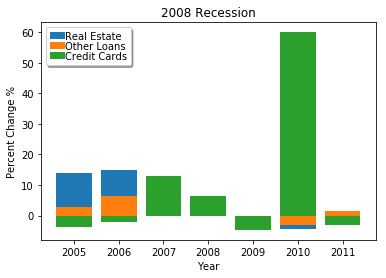

In [52]:
plt.bar(third_rec_per['Year'],third_rec_per['Real Estate'])
plt.bar(third_rec_per['Year'],third_rec_per['Other Loans'])
plt.bar(third_rec_per['Year'],third_rec_per['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Other Loans', 'Credit Cards'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.title('2008 Recession')
plt.xlabel('Year')
plt.ylabel('Percent Change %')
plt.savefig(f'../clean_graphs/per_delta_bar_09.png')
plt.show()

In [53]:
frp = first_rec_per
srp = second_rec_per.reset_index(drop = True)
trp = third_rec_per.reset_index(drop = True)

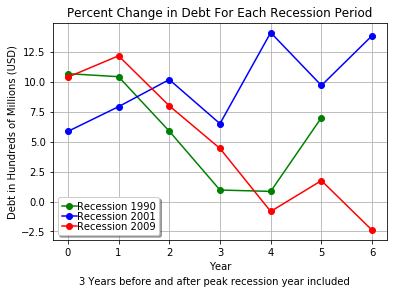

In [54]:
plt.plot(frp['Total Loans'],
        color='green', marker='o', linestyle='solid')
plt.plot(srp['Total Loans'],
        color='blue', marker='o', linestyle='solid')
plt.plot(trp['Total Loans'],
        color='red', marker='o', linestyle='solid')
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.grid()
plt.title('Percent Change in Debt For Each Recession Period')
plt.xlabel('Year')
plt.ylabel('Debt in Hundreds of Millions (USD)')
plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
plt.savefig(f'../graphs/per_delta_line.png')
plt.show()

In [55]:
# Function to create line graph for percent change for each recession
def per_line_plot(column_name):
    plt.plot(frp[column_name],
        color='green', marker='o', linestyle='solid')
    plt.plot(srp[column_name],
        color='blue', marker='o', linestyle='solid')
    plt.plot(trp[column_name],
        color='red', marker='o', linestyle='solid')
    plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    plt.grid()
    plt.title(f'Percent Change of {column_name}')
    plt.xlabel('Year')
    plt.ylabel('Percent Change')
    plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.savefig(f'../graphs/per_delta_bar_{column_name}.png')
    plt.show()

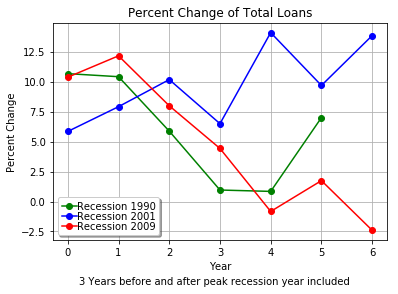

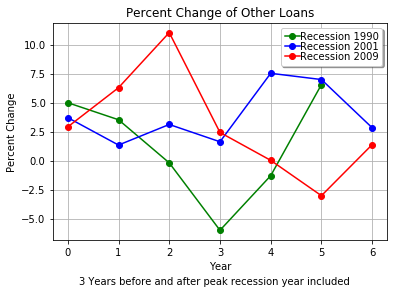

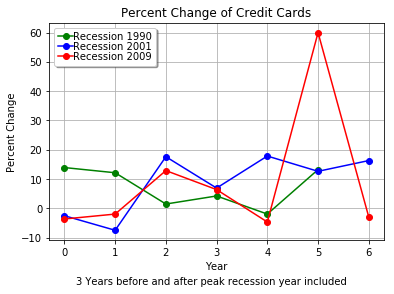

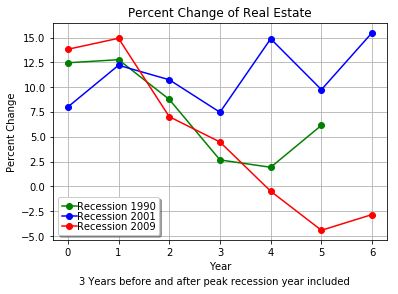

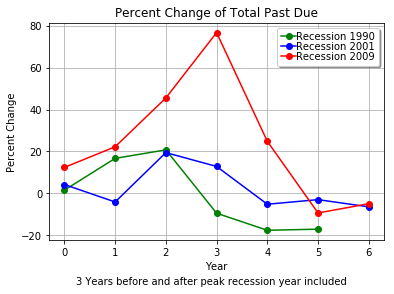

In [56]:
# Loops over function to generate line graph for each plot
for col, val in enumerate(col_names):
    per_line_plot(col_names[col])


In [57]:
first_rec['Ratio Past Due to Total Loans'] = first_rec['Total Past Due'] / first_rec['Total Loans'] 
second_rec['Ratio Past Due to Total Loans'] = second_rec['Total Past Due'] / second_rec['Total Loans'] 
third_rec['Ratio Past Due to Total Loans'] = third_rec['Total Past Due'] / third_rec['Total Loans']
ratio_past_due_df = percentage_delta_df
ratio_past_due_df['Ratio Past Due to Total Loans'] = ratio_past_due_df['Total Past Due'] / ratio_past_due_df['Total Loans']

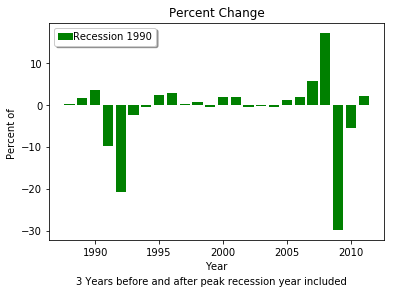

In [58]:
    plt.bar(ratio_past_due_df['Year'], ratio_past_due_df['Ratio Past Due to Total Loans'], color='green')
    plt.legend(['Recession 1990'], loc='best', 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
    plt.title(f'Percent Change')
    plt.xlabel('Year')
    plt.ylabel('Percent of ')
    plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()

In [59]:
# Function to create line graph for percent change for each recession
def per_of_tot(input_df):
    year_name  = input_df['Year'][3]
    plt.plot(input_df['Year'], input_df['Ratio Past Due to Total Loans'], 
             color='green', marker='o', linestyle='solid')
    plt.plot(input_df['Year'][3], input_df['Ratio Past Due to Total Loans'][3], 
             color='blue', marker='o', linestyle='solid')
    plt.grid()
    plt.title(f"Past Due Debt Percentage of Total Debt ({year_name})")
    plt.xlabel('Year')
    plt.ylabel('Percent of Total Debt')
    plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
    
    plt.savefig(f'../clean_graphs/per_delta_line_{year_name}.png')
    plt.show()

In [60]:
def per_of_tot_bar(input_df):
    year_name  = input_df['Year'][3]
    plt.bar(input_df['Year'], input_df['Ratio Past Due to Total Loans'], 
             color='green')
    plt.title(f"Past Due Debt Percentage of Total Debt ({year_name})")
    plt.xlabel('Year')
    plt.ylabel('Percent of Total Debt')
    plt.figtext(0.5, -0.03, caption_text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.savefig(f'../clean_graphs/per_delta_bar_{year_name}.png')
    plt.show()

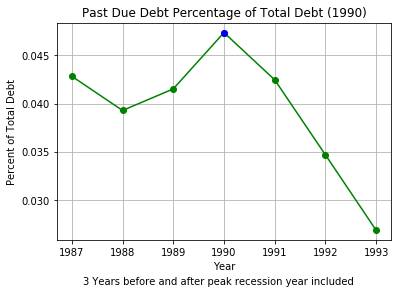

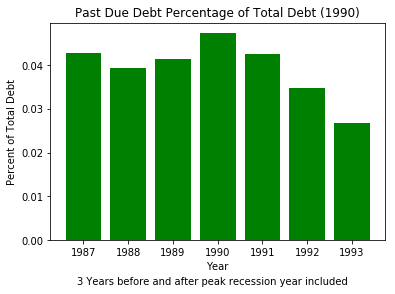

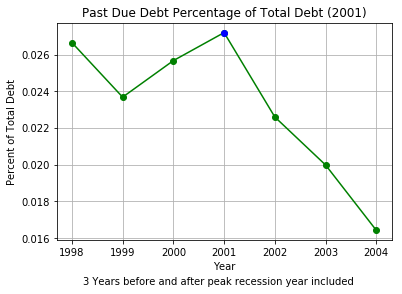

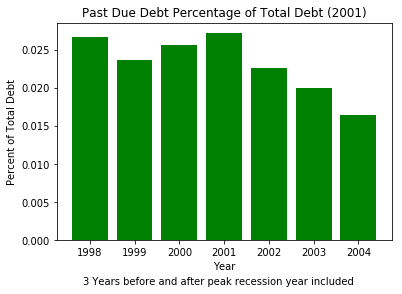

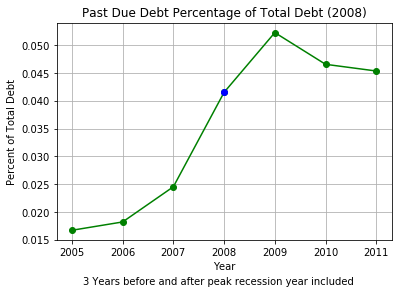

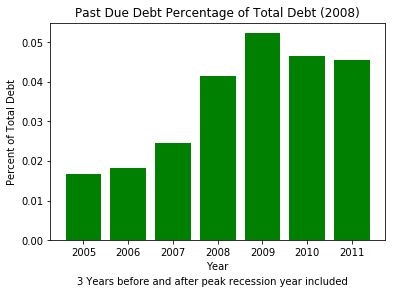

In [61]:
# Loops over function to generate line graph for each plot
#for col, val in enumerate(col_names):
#    per_line_plot(col_names[col])
list_of_df = [first_rec, second_rec, third_rec]
for dataframe in list_of_df:
    per_of_tot(dataframe)
    per_of_tot_bar(dataframe)

In [62]:
first_rec_percentage_csv = first_rec_per.drop(columns = ['Total Loans'])
first_rec_percentage_csv.to_csv('libs/percentages_first.csv')

In [63]:
second_rec_percentage_csv = second_rec_per.drop(columns = ['Total Loans'])
second_rec_percentage_csv.to_csv('libs/percentages_second.csv')

In [64]:
third_rec_percentage_csv = third_rec_per.drop(columns = ['Total Loans'])
third_rec_percentage_csv.to_csv('libs/percentages_third.csv')